In [1]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

In [89]:
#FUNCTIONS
def plot_lines(df):
    y_plot = []
    for i in range(len(df['alpha'])):
        y = df['alpha'][i] + df['beta'][i] * np.array([0,len(df['alpha'])])
        plt.plot(np.array([0,len(df['alpha'])]), y)


def quantiles(heights):
    max = []
    min = []
    q_5 = []
    q_25 = []
    q_50 = []
    q_75 = []
    q_95 = []
    for i in range(len(heights[0])):
        height = heights[:,i]
        max.append(np.max(height))
        min.append(np.min(height))
        q_5.append(np.quantile(height,0.05))
        q_25.append(np.quantile(height,0.25))
        q_50.append(np.quantile(height,0.50))
        q_75.append(np.quantile(height,0.75))
        q_95.append(np.quantile(height,0.95))
    plot_vars = [max, min, q_5, q_25, q_50, q_75, q_95]
    for i in plot_vars:
        plt.plot(i)
    plt.legend(["Max height", "Min height", "5 quantile", "25 quantile", "50 quantile", "75 quantile", "95 quantile", ])  

In [2]:
#TASK 1 - PRIOR PREDICTIVE CHECKS
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATABASE_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATABASE_PATH, sep=";", header=0)
d = d[d.age>=18] # Just adults
d.head()


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
C:\Users\xyz\AppData\Local\Temp\ipykernel_14852\1604096608.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1_plot = df1.drop(df1.columns[:-3], 1)


Text(0.5, 1.0, 'Joint distribution of mu and sigma')

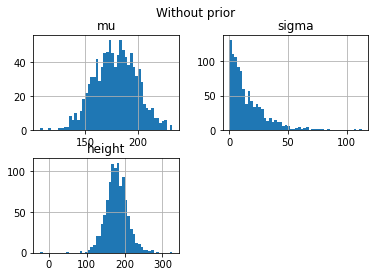

<Figure size 432x288 with 0 Axes>

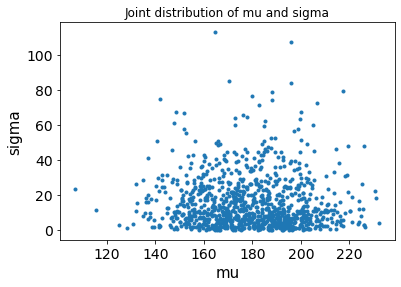

In [20]:
model_pcc = CmdStanModel(stan_file = "height_1_pcc.stan")

R = 1000
sim = model_pcc.sample(iter_sampling = R,
                        iter_warmup = 0,
                        chains = 1,
                        fixed_param=True,
                        seed = 29032020, refresh = R)
df1 = sim.draws_pd()
# print(df1)


#1. PLOT HISTOGRAMS OF MU, SIGMA, AND SIMULATED HEIGHT
bins = 50
df1_plot = df1.drop(df1.columns[:-3], 1)
df1_plot.hist(bins = bins)
plt.suptitle("Without prior")

#2. PLOT A JOINT DISTRIBUTION OF MU AND SIGMA 
plt.figure(2)
az.plot_pair({"mu": df1["mu"], "sigma": df1["sigma"]})
plt.title("Joint distribution of mu and sigma")


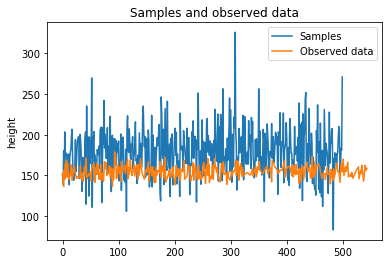

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


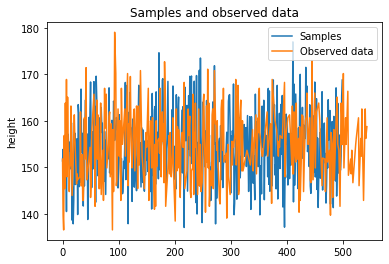

In [14]:

# #3. CHECK IF SAMPLES ARE CONSISTENT WITH PRIORS
plt.figure(3)
plt.plot(df1['height'][:500])
plt.plot(d['height'][:500])
plt.ylabel("height")
plt.title("Samples and observed data")
plt.legend(['Samples', 'Observed data'])
plt.show()

# #4. Check if observed data is possible to obtain using priors.
model_1_fit = CmdStanModel(stan_file='height_1_fit.stan')
fit=model_1_fit.sample(data=dict(N=len(d),
                        heights=d.height.values),
                        seed=28052020)

df2 = fit.draws_pd()
plt.figure(4)
plt.plot(df2['height'][:500])
plt.plot(d['height'][:500])
plt.ylabel("height")
plt.title("Samples and observed data")
plt.legend(['Samples', 'Observed data'])

#Using priors improved the results

Text(0, 0.5, 'sigma')

<Figure size 432x288 with 0 Axes>

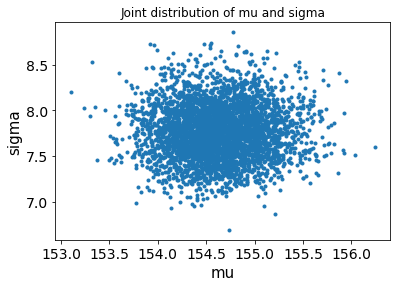

In [21]:

#TASK 2 MODEL FIT AND EVALUATION
bins = 30
#1. Plot a joint distribution of fitted mu and sigma
plt.figure(5)
az.plot_pair({"mu": df2["mu"], "sigma": df2["sigma"]})
plt.title("Joint distribution of mu and sigma")
plt.xlabel("mu")
plt.ylabel("sigma")

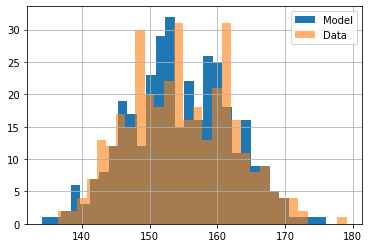

In [22]:

#2. Plot histograms of data and simulated heights and evaluate the quality of model.
plt.figure(6)
df2.tail(len(d))["height"].hist(bins = bins)
d["height"].hist(bins = bins, alpha = 0.6)
plt.legend(["Model", "Data"])
plt.show()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



     lp__  accept_stat__    alpha       beta      sigma  height[1]  height[2]  \
0     0.0            0.0  232.163   7.771810  23.208300        NaN        NaN   
1     0.0            0.0  154.022  -0.067795   0.086958        NaN        NaN   
2     0.0            0.0  169.461 -11.386400  20.358900        NaN        NaN   
3     0.0            0.0  158.357  -2.544520   6.415610        NaN        NaN   
4     0.0            0.0  158.131  16.710200   9.955320        NaN        NaN   
..    ...            ...      ...        ...        ...        ...        ...   
995   0.0            0.0  161.753  12.613000   6.017940        NaN        NaN   
996   0.0            0.0  196.362  12.233800  10.413300        NaN        NaN   
997   0.0            0.0  172.792  -2.720510  76.805200        NaN        NaN   
998   0.0            0.0  126.115   9.871600  23.204300        NaN        NaN   
999   0.0            0.0  203.609  -5.146610  12.390200        NaN        NaN   

     height[3]  height[4] 

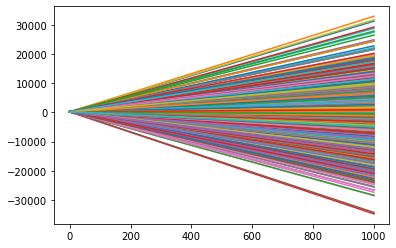

In [73]:
#ADDING PREDICTOR TO THE MODEL - WEIGHT
mean = sum(d['weight']) / len(d['weight'])
d['c_weight'] = d['weight'] - mean

model_pcc = CmdStanModel(stan_file="height_2a_ppc.stan")
R = 1000
data_sim = {"N": 50, "weight": np.linspace(d.c_weight.min(), d.c_weight.max())}
sim = model_pcc.sample(data = data_sim,
                        iter_sampling=R,
                        iter_warmup=0,
                        chains = 1,
                        refresh=R,
                        fixed_param=True,
                        seed=29042020)


#Task 4: Prior predictive checks

#1. Plot lines for each sampled slope beta and intercept alpha, verify if 
# possible predicted heights are consistent with minimum (0) and maximum 
# (check Wikipedia) heights observed in nature.

df4 = sim.draws_pd()
print(df4)

plot_lines(df4)
print('Max height: ', np.max(sim.stan_variable('height')))
print('Min height: ', np.min(sim.stan_variable('height')))

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.



Maximal predicted height:  668.345
Minimal predicted height:  -200.322


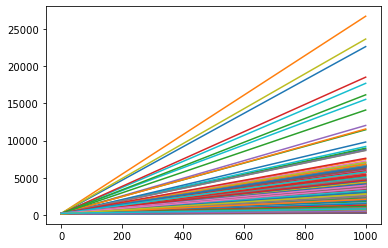

In [74]:
#TASK 5
#1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

df5 = sim.draws_pd()


plot_lines(df5)
print("Maximal predicted height: ", np.max(sim.stan_variable('height')))
print("Minimal predicted height: ", np.min(sim.stan_variable('height')))


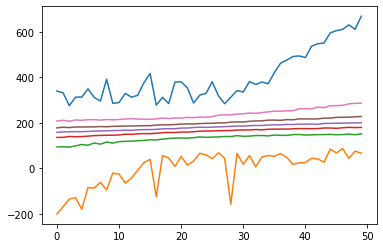

In [60]:
#2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?
    
quantiles(sim.stan_variable("height"))


In [103]:
#TASK 6
#1. Create data_fit dictionary containing data from N first rows of dataframe
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')
n = 300
data_fit = {
    "N": n,
    "weight": d["weight"][:n],
    "heights": d["height"][:n]
}

fit=model_2_fit.sample(data=data_fit,seed=28052020)

df_6 = fit.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


ERROR:cmdstanpy:Chain [2] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [4] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [3] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: mismatch in dimension declared and found in context; processing stage=data initialization; variable name=weight; position=0; dims declared=(400); dims found=(352) (in 'C:/Users/xyz/Desktop/AGH/AUTOMA~1/SEMEST~1/DATAAN~1/lab4/lab4/height_2_fit.stan', line 3, column 4 to column 21)
Exception: mismatch in dimension declared and found in context; processing stage=data initialization; variable name=weight; position=0; dims declared=(400); dims found=(352) (in 'C:/Users/xyz/Desktop/AGH/AUTOMA~1/SEMEST~1/DATAAN~1/lab4/lab4/height_2_fit.stan', line 3, column 4 to column 21)
Exception: mismatch in dimension declared and found in context; processing stage=data initialization; variable name=weight; position=0; dims declared=(400); dims found=(352) (in 'C:/Users/xyz/Desktop/AGH/AUTOMA~1/SEMEST~1/DATAAN~1/lab4/lab4/height_2_fit.stan', line 3, column 4 to column 21)
Exception: mismatch in dimension declared and found in context; processing stage=data initialization; variable name=weight; position=0; dims declared=(400); dims found=(352) (in 'C:/Users/xyz/Desktop/AGH/AUTOMA~1/SEMEST~1/DATAAN~1/lab4/lab4/height_2_fit.stan', line 3, column 4 to column 21)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['C:\\Users\\xyz\\Desktop\\AGH\\Automatyka i Robotyka\\Semester 1\\Data analytics\\lab4\\lab4\\height_2_fit.exe', 'id=1', 'random', 'seed=28052020', 'data', 'file=C:\\Users\\xyz\\AppData\\Local\\Temp\\tmp0k1r9eyy\\8qejldom.json', 'output', 'file=C:\\Users\\xyz\\AppData\\Local\\Temp\\tmp0k1r9eyy\\height_2_fit-20220402125553_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	C:\Users\xyz\AppData\Local\Temp\tmp0k1r9eyy\height_2_fit-20220402125553_1.csv
 console_msgs (if any):
	C:\Users\xyz\AppData\Local\Temp\tmp0k1r9eyy\height_2_fit-20220402125553_0-stdout.txt

(100.0, 200.0)

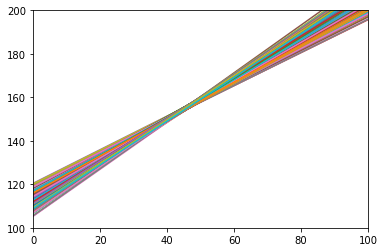

In [101]:
#Task 7. Evaluating model
#1. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
plot_lines(df_6)
plt.xlim([0,100])
plt.ylim([100, 200])

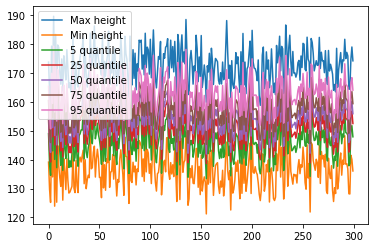

In [102]:
#2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.
quantiles(fit.stan_variable("height"))

In [ ]:
# When N increases, the predicted data exhibits less variability